In [1]:
import csv
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from scipy.signal import butter, lfilter,freqz
import scipy.signal as sproc
from scipy import signal

In [2]:
data = pd.read_csv("28A18305A90B_20180315003728.csv",skiprows=5)
data

,//ARTIFACT,NUM,DATE,ACC_X,ACC_Y,ACC_Z,GYRO_X,GYRO_Y,GYRO_Z,EOG_L,EOG_R,EOG_H,EOG_V
0,NaN,1,2018/03/15 00:37:28.43,-2608,11310,-11698,-219,-83,438,26,133,-107,-79
1,NaN,2,2018/03/15 00:37:28.45,-2698,11339,-11713,-174,-160,289,-26,81,-107,-27
2,NaN,3,2018/03/15 00:37:28.47,-2603,11370,-11565,-76,-196,144,-56,35,-91,10
3,NaN,4,2018/03/15 00:37:28.49,-2651,11338,-11514,49,-155,-9,-100,-11,-89,55
4,NaN,5,2018/03/15 00:37:28.51,-2606,11265,-11548,76,-120,-102,-90,6,-96,42
5,NaN,6,2018/03/15 00:37:28.53,-2626,11157,-11578,75,-161,-121,-128,-32,-96,80
6,NaN,7,2018/03/15 00:37:28.55,-2633,11102,-11532,-27,-213,-84,-121,-16,-105,68
7,NaN,8,2018/03/15 00:37:28.57,-2626,11049,-11588,-102,-245,15,-66,51,-117,7
8,NaN,9,2018/03/15 00:37:28.59,-2741,11110,-11592,-85,-250,88,-42,88,-130,-23
9,NaN,10,2018/03/15 00:37:28.61,-2673,11153,-11508,-38,-214,153,-14,128,-142,-57


In [3]:
data.dtypes

//ARTIFACT    float64
NUM             int64
DATE           object
ACC_X           int64
ACC_Y           int64
ACC_Z           int64
GYRO_X          int64
GYRO_Y          int64
GYRO_Z          int64
EOG_L           int64
EOG_R           int64
EOG_H           int64
EOG_V           int64
dtype: object

In [4]:
df= data['DATE'].apply(lambda x : pd.to_datetime(str(x)))
df = df.dt.hour*3600+df.dt.minute*60+df.dt.second+df.dt.microsecond/10**6
data['Time'] = df.values-df.values[0]
data

,//ARTIFACT,NUM,DATE,ACC_X,ACC_Y,ACC_Z,GYRO_X,GYRO_Y,GYRO_Z,EOG_L,EOG_R,EOG_H,EOG_V,Time
0,NaN,1,2018/03/15 00:37:28.43,-2608,11310,-11698,-219,-83,438,26,133,-107,-79,0.00
1,NaN,2,2018/03/15 00:37:28.45,-2698,11339,-11713,-174,-160,289,-26,81,-107,-27,0.02
2,NaN,3,2018/03/15 00:37:28.47,-2603,11370,-11565,-76,-196,144,-56,35,-91,10,0.04
3,NaN,4,2018/03/15 00:37:28.49,-2651,11338,-11514,49,-155,-9,-100,-11,-89,55,0.06
4,NaN,5,2018/03/15 00:37:28.51,-2606,11265,-11548,76,-120,-102,-90,6,-96,42,0.08
5,NaN,6,2018/03/15 00:37:28.53,-2626,11157,-11578,75,-161,-121,-128,-32,-96,80,0.10
6,NaN,7,2018/03/15 00:37:28.55,-2633,11102,-11532,-27,-213,-84,-121,-16,-105,68,0.12
7,NaN,8,2018/03/15 00:37:28.57,-2626,11049,-11588,-102,-245,15,-66,51,-117,7,0.14
8,NaN,9,2018/03/15 00:37:28.59,-2741,11110,-11592,-85,-250,88,-42,88,-130,-23,0.16
9,NaN,10,2018/03/15 00:37:28.61,-2673,11153,-11508,-38,-214,153,-14,128,-142,-57,0.18


<IPython.core.display.Javascript object>


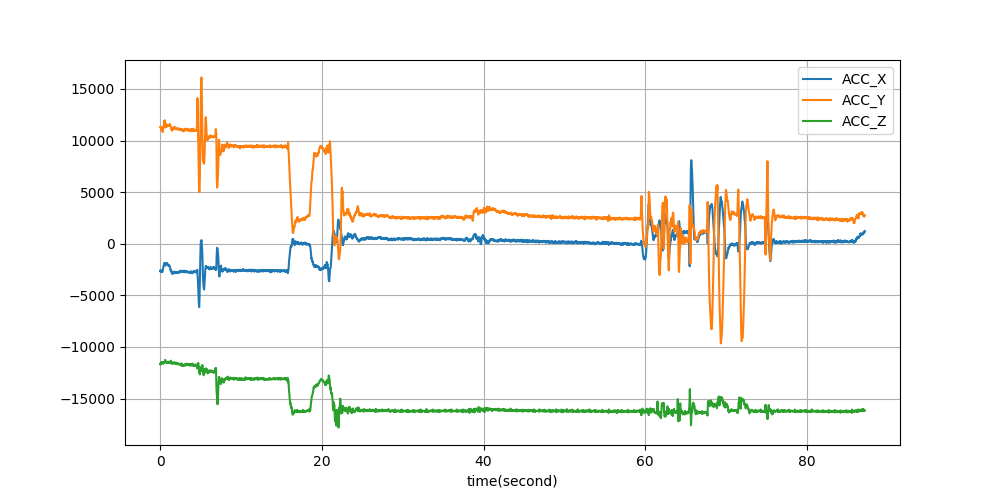

In [5]:
plt.figure(figsize=(10,5))
plt.plot(data.Time,data.ACC_X)
plt.plot(data.Time,data.ACC_Y)
plt.plot(data.Time,data.ACC_Z)
plt.grid()
plt.xlabel('time(second)')
plt.legend(['ACC_X','ACC_Y','ACC_Z'],loc='upper right')
plt.show()

In [6]:
#low pass filter design
#numerator design
bl = np.zeros(6)
bl[5] = -1
bl[0] = 1
bp = np.poly1d(bl)
bp = bp**2
bp.coeffs

array([ 1.,  0.,  0.,  0.,  0., -2.,  0.,  0.,  0.,  0.,  1.])

In [7]:
al = np.zeros(2)
al[0] = 1
al[1] = -1
ap = np.poly1d(al)
ap = ap**2
ap.coeffs

array([ 1., -2.,  1.])

In [8]:
#High pass filter
bh = np.zeros(32)
bh[31] = 1
bh[15] = 32
bh[0] = -1
bh

array([ -1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  32.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.])

In [9]:
ah = np.zeros(2)
ah[0] = 1
ah[1] = 1
ah

array([ 1.,  1.])

In [10]:
yl = lfilter(bp.coeffs,ap.coeffs,signal.detrend(data.EOG_V))
yh = lfilter(bh,ah,yl)

In [11]:
# fig, ax1 = plt.subplots()
# ax1.plot(data.Time,yh)
# ax1.tick_params(axis='y')
# ax2 = ax1.twinx() 
# color = 'tab:red'
# ax2.plot(data.Time,data.EOG_V, color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# # plt.legend(['a','b'])
# plt.grid()
# plt.show()

In [12]:
y = signal.filtfilt([-1, 2, 0, 2, 1],[1],yh)

<IPython.core.display.Javascript object>


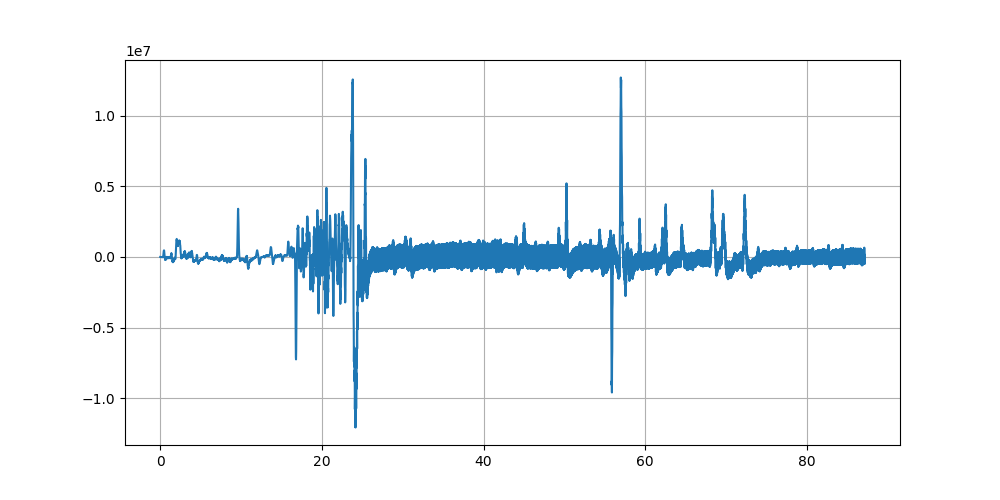

In [13]:
plt.figure(figsize=(10,5))
plt.plot(data.Time,y)
plt.yticks
# plt.plot(data.Time,data.EOG_V)
plt.grid(True)
plt.show()

In [14]:
yy = y**2

<IPython.core.display.Javascript object>


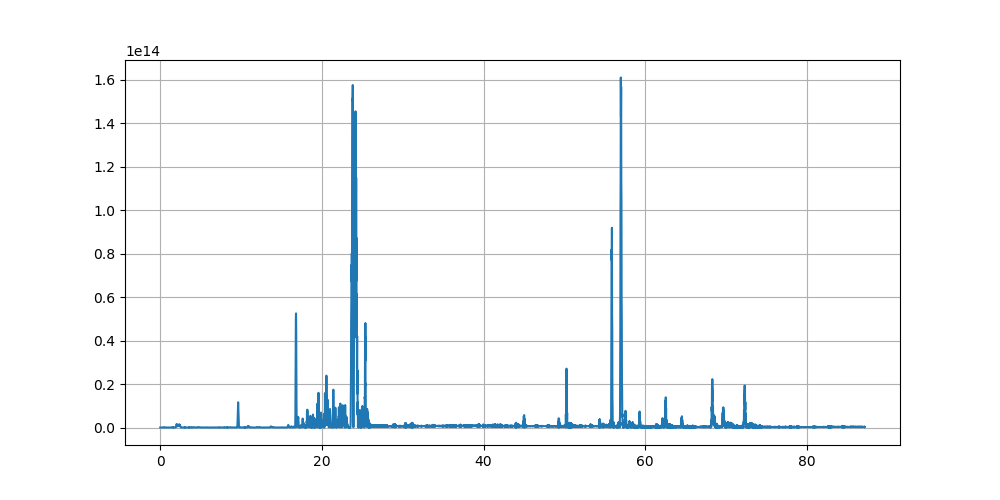

In [15]:
plt.figure(figsize=(10,5))
plt.plot(data.Time,yy)
plt.yticks
# plt.plot(data.Time,data.EOG_V)
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


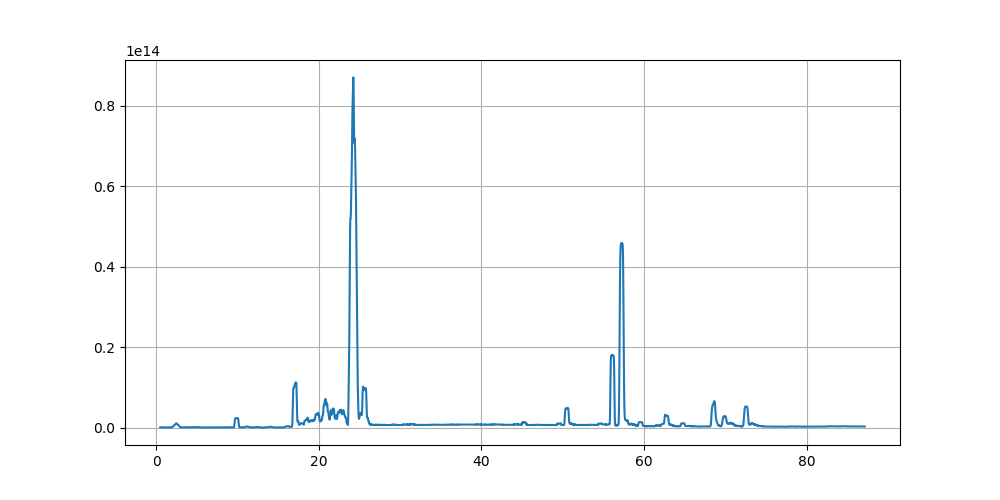

In [25]:
df = pd.DataFrame(yy)
nn = df.rolling(window=25).mean()
plt.figure(figsize=(10,5))
plt.plot(data.Time,nn)
plt.yticks
# plt.plot(data.Time,data.EOG_V)
plt.grid(True)
plt.show()

In [17]:
# w, h = freqz(bh,ah)
# fig = plt.figure()
# plt.title('Digital high pass filter frequency response')
# ax1 = fig.add_subplot(111)
# plt.plot(w, 20 * np.log10(abs(h)), 'b')
# plt.ylabel('Amplitude [dB]', color='b')
# plt.xlabel('Frequency [rad/sample]')
# ax2 = ax1.twinx()
# angles = np.unwrap(np.angle(h))
# plt.plot(w, angles, 'g')
# plt.ylabel('Angle (radians)', color='g')
# plt.grid()
# plt.axis('tight')
# plt.show()

In [18]:
from scipy import fftpack

In [19]:
x = signal.detrend(data.EOG_V)
f_s = 100

<IPython.core.display.Javascript object>


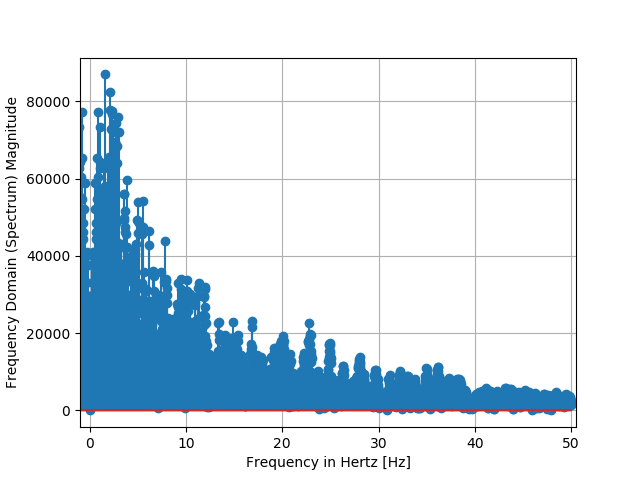

In [20]:
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-1, (f_s+1) / 2)
ax.grid()
# ax.set_ylim(-5, 110)
fig.show()

<IPython.core.display.Javascript object>


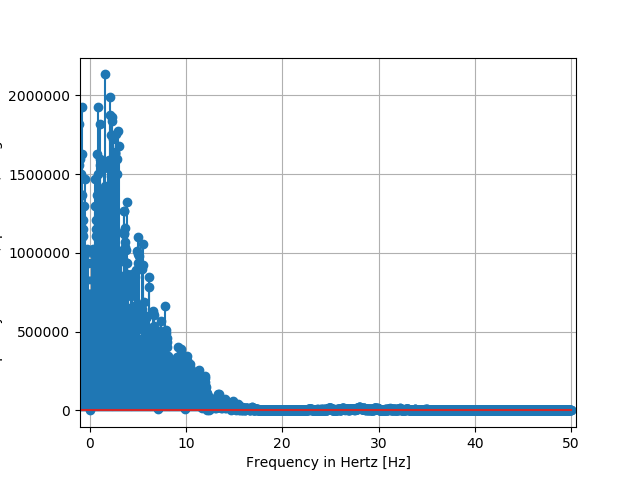

In [21]:
x = yl
f_s = 100
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-1, (f_s+1) / 2)
ax.grid()
# ax.set_ylim(-5, 110)
fig.show()

<IPython.core.display.Javascript object>


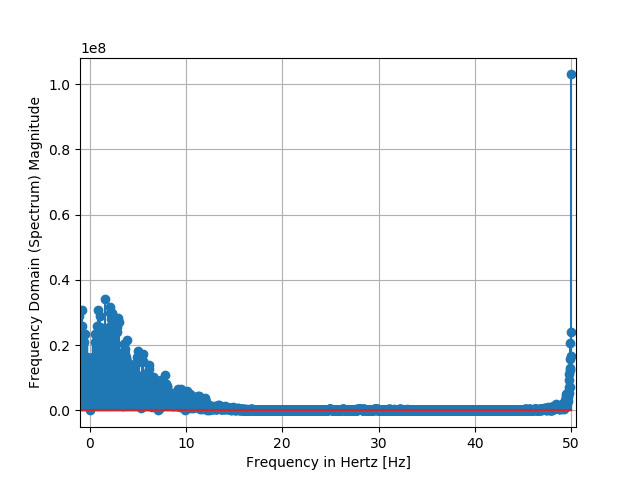

In [22]:
x = yh
f_s = 100
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-1, (f_s+1) / 2)
ax.grid()
# ax.set_ylim(-5, 110)
fig.show()

<IPython.core.display.Javascript object>


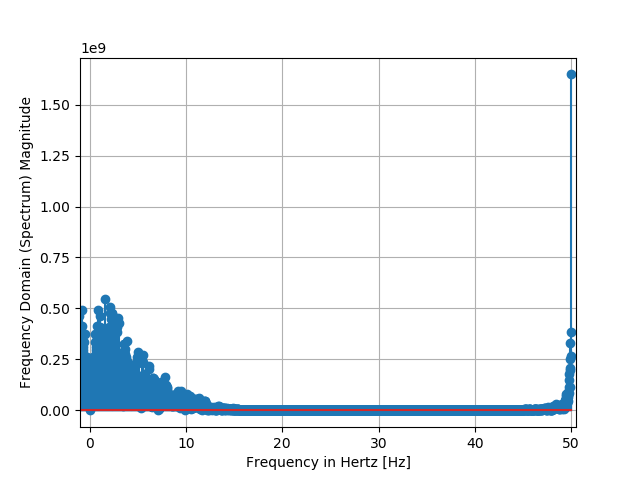

In [23]:
x = y
f_s = 100
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-1, (f_s+1) / 2)
ax.grid()
# ax.set_ylim(-5, 110)
fig.show()

<IPython.core.display.Javascript object>


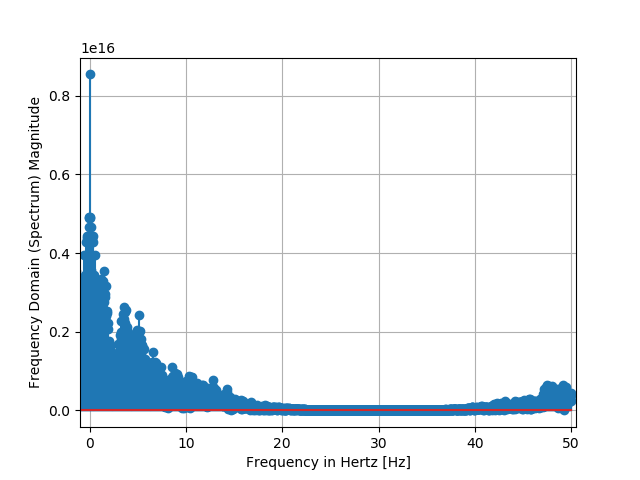

In [24]:
x = yy
f_s = 100
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-1, (f_s+1) / 2)
ax.grid()
# ax.set_ylim(-5, 110)
fig.show()

In [26]:
datContent = [i.strip().split() for i in open("16265.dat").readlines()]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xdf in position 0: invalid continuation byte